# IDENTIFIABILITY

This notebook explores issues with identifying parameters of a model.

**Identifiability**: Given a model $\dot{x} = f(x; \theta)$, where $x$ is a vector of floating concentrations and $\theta$ are parameters.
If we know $x$, can we find unique values for $\theta$?

# Preliminaries

In [1]:
import pandas as pd
import numpy as np
import tellurium as te

# Example

In [2]:
MODEL1 = """
S1 -> S2; k1*k2*S1
S2 -> S1; k3*S2
S3 ->; k4*S3

S1 = 10
S3 = 15
k1 = 1
k2 = 2
k3 = 3
k4 = 4
"""

In this model, what are:
* $x$
* $\theta$
* $f$

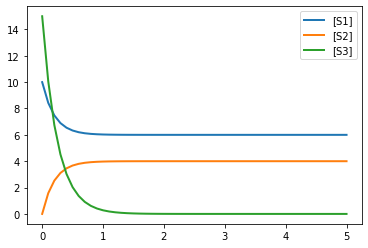

In [3]:
rr = te.loada(MODEL1)
data = rr.simulate()
rr.plot()

In [4]:
DATA1_DF = pd.DataFrame(data[30:,1:3], columns=["[S1]", "[S2]"], index=data[30:,0])
DATA1_DF.index.name = "time"
DATA1_DF

,[S1],[S2]
time,,
3.0,6.000001,3.999999
3.1,6.000001,3.999999
3.2,6.000000,4.000000
3.3,6.000000,4.000000
3.4,6.000000,4.000000
3.5,6.000000,4.000000
3.6,6.000000,4.000000
3.7,6.000000,4.000000
3.8,6.000000,4.000000


OK!


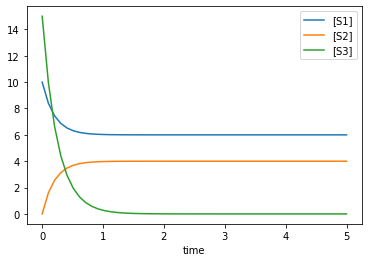

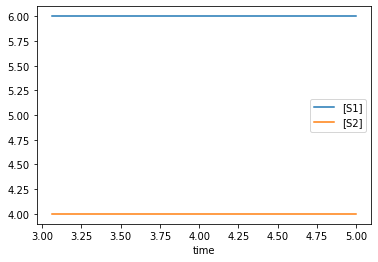

In [25]:
def simulate(model, species=["[S1]", "[S2]", "[S3]"], start_time=0, is_plot=True):
    """
    Simulate the model and plot the result. Assumes 10 points per second.
    
    Parameters
    ----------
    model: str (antimony model)
    species: list-str (species to include)
    start_index: int (index of data to report)
    is_plot: bool (plot the result)
    """
    POINT_PER_SEC = 10
    END_TIME = 5
    TIME = "time"
    NUM_POINT = 50
    #
    rr = te.loada(model)
    num_point = int((END_TIME - start_time)*10) + 1
    colnames = list(species)
    all_colnames = list(colnames)
    all_colnames.insert(0, TIME)
    num_species = len(species)
    data = rr.simulate(0, END_TIME, NUM_POINT, all_colnames)
    column_idxs = np.array([i for i in range(len(colnames)) if species[i] in species], dtype=int)
    column_idxs += 1
    df = pd.DataFrame(data[:, column_idxs], columns=species)
    df.index = data[:, 0]
    df.index.name = TIME
    df = df[df.index >= start_time]
    if is_plot:
        df.plot()
    return df

# Tests
df = simulate(MODEL1, is_plot=False)
assert(isinstance(df, pd.DataFrame))
assert(len(df.columns) == 3)
assert(len(df) > 0)
#
df = simulate(MODEL1, start_time=3, species=["[S1]", "[S2]"], is_plot=False)
diff = np.sum([ (x - y)**2 for x, y in zip(df.values, DATA1_DF.values)])
assert(np.isclose(diff, 0))
print("OK!")

In [23]:
diff


3.4091271046436593e-13

In [19]:
df

,[S1],[S2]
time,,
3.061224,6.000001,3.999999
3.163265,6.000001,3.999999
3.265306,6.000000,4.000000
3.367347,6.000000,4.000000
3.469388,6.000000,4.000000
3.571429,6.000000,4.000000
3.673469,6.000000,4.000000
3.775510,6.000000,4.000000
3.877551,6.000000,4.000000


Given ``DATA1_DF``, can we find ``k1``, ``k2``, ``k3``, ``k4``?

# Can we find ``k4`` from ``DATA1_DF``?

This question is equivalent to "Does k4 affect DATA1_DF?"

In [ ]:
MODEL1 = """
S1 -> S2; k1*k2*S1
S2 -> S1; k3*S2
S3 ->; k4*S3

S1 = 10
S3 = 15
k1 = 1
k2 = 2
k3 = 3
k4 = 4
"""
DATA1_DF = simulate(MODEL1, start_idx=30, species=["S1", "S2"], is_plot=True)

In [ ]:
MODEL2 = """
S1 -> S2; k1*k2*S1
S2 -> S1; k3*S2
S3 ->; k4*S3

S1 = 10
S3 = 15
k1 = 1
k2 = 2
k3 = 3
k4 = 40
"""
DATA1_DF = simulate(MODEL2, start_idx=30, species=["S1", "S2"], is_plot=True)

# Can we find ``k1``, ``k2``, ``k3`` from DATA1_DF?

# Insights into Identifiability

1. Can only identify parameters that affect the output data.
1. Can only infer parameters if there are sufficient dynamics in the data.
1. Can only identify parameters occur in isolation (or can be inferred from combinations).